<a href="https://colab.research.google.com/github/AriyantGit/CT-Scan-Image-Classification-Using-ResNet50/blob/main/COVID_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Go to Google Drive, upload this notebook and dataset folders. Rigth click notebook, choose Open with -> Google Colab


> * To activate GPU in Colab, go to **Runtime -> Change Runtime Type**. Under **Hardware accelerator** choose **GPU** 



# **Connect to Google Drive to access Dataset**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Import all dependencies**

In [2]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# **Here are a few parameters used in deep learning**

In [3]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224]

# training config:
epochs = 500
batch_size = 32

#define paths
covid_path = '/content/drive/MyDrive/Capstone_project/COVID'
noncovid_path = '/content/drive/MyDrive/Capstone_project/non-COVID'

# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [6]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['/content/drive/MyDrive/Capstone_project/COVID/Covid (215).png', '/content/drive/MyDrive/Capstone_project/COVID/Covid (124).png', '/content/drive/MyDrive/Capstone_project/COVID/Covid (26).png', '/content/drive/MyDrive/Capstone_project/COVID/Covid (187).png', '/content/drive/MyDrive/Capstone_project/COVID/Covid (203).png']
Total Count:  1252
First 5 NonCovid Files:  ['/content/drive/MyDrive/Capstone_project/non-COVID/Non-Covid (1105).png', '/content/drive/MyDrive/Capstone_project/non-COVID/Non-Covid (103).png', '/content/drive/MyDrive/Capstone_project/non-COVID/Non-Covid (1050).png', '/content/drive/MyDrive/Capstone_project/non-COVID/Non-Covid (1102).png', '/content/drive/MyDrive/Capstone_project/non-COVID/Non-Covid (271).png']
Total Count:  1229


# **Fetch Images and Class Labels from Files (This might take a while)**

In [13]:
## Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') #append class label
for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

In [10]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

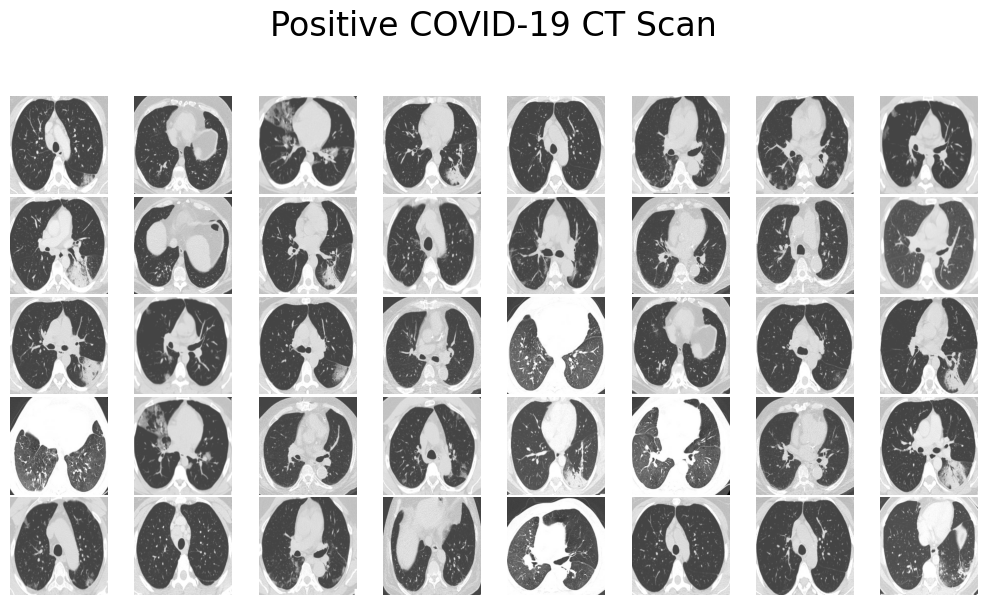

In [11]:
plot_images(covid_images, 'Positive COVID-19 CT Scan')

# **Normalization**
Model takes images in the form of array of pixels. Hence convert into array and normalize

In [14]:
# convert to array and normalize to interval of [0, 1]

covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

# **Train Test Split**

In [16]:
# Split into training and testing sets for both types of images

covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(covid_images, covid_labels, test_size = 0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(noncovid_images, noncovid_labels, test_size = 0.2)

# Merge sets for both types of images

x_train = np.concatenate((noncovid_x_train, covid_x_train), axis = 0)
x_test = np.concatenate((noncovid_x_test, covid_x_test), axis = 0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis = 0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis = 0)

# Make labels into categories - either 0 or 1, for our model

y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

# Visualize a few images from Training and Test sets

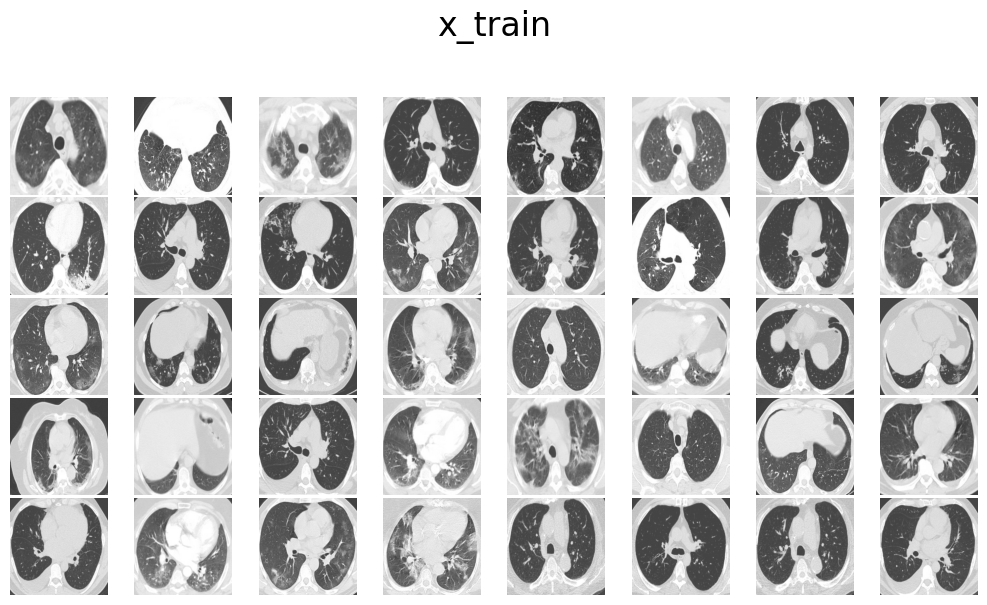

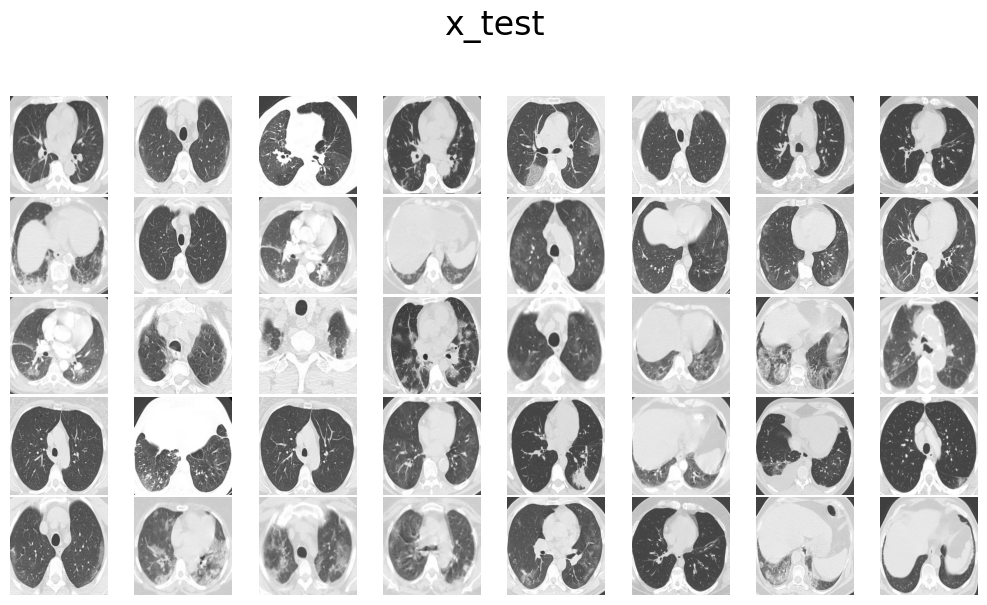

In [17]:
plot_images(covid_x_train, 'x_train')
plot_images(covid_x_test, 'x_test')
